In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import re

In [2]:
Data = pd.read_csv('Airbnbprediction.csv', index_col='id')
Data.shape

(74111, 28)

In [3]:
Data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [4]:
Data.shape

(74111, 28)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74111 entries, 6901257 to 3534845
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-n

array([[<Axes: title={'center': 'log_price'}>]], dtype=object)

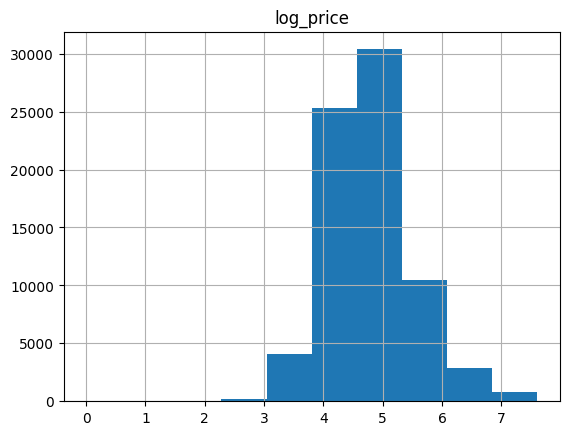

In [6]:
Data.hist('log_price')

In [7]:
Data.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
Data.duplicated()


id
6901257     False
6304928     False
7919400     False
13418779    False
3808709     False
            ...  
14549287    False
13281809    False
18688039    False
17045948    False
3534845     False
Length: 74111, dtype: bool

In [9]:
Data.isna()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6304928,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7919400,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13418779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3808709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13281809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18688039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
Data.property_type

id
6901257     Apartment
6304928     Apartment
7919400     Apartment
13418779        House
3808709     Apartment
              ...    
14549287    Apartment
13281809    Apartment
18688039    Apartment
17045948    Apartment
3534845          Boat
Name: property_type, Length: 74111, dtype: object

<Axes: xlabel='log_price', ylabel='Count'>

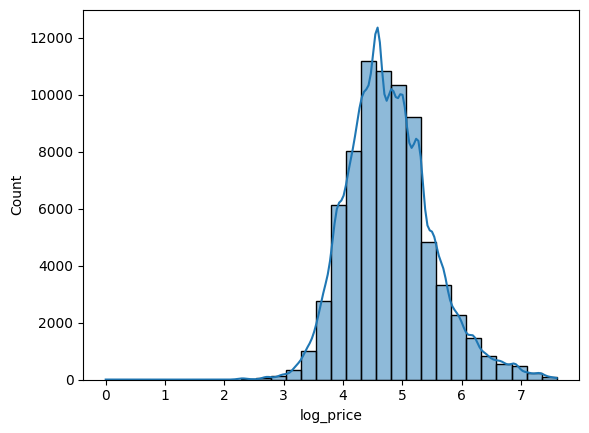

In [11]:
sns.histplot(Data['log_price'], kde=True, bins=30)

<Axes: xlabel='log_price', ylabel='Count'>

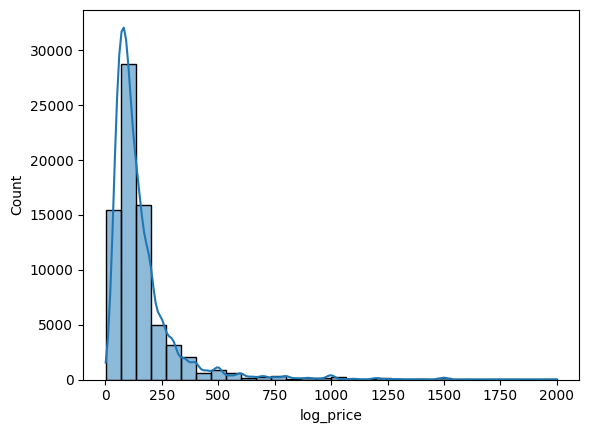

In [12]:
sns.histplot(Data['log_price'].apply(lambda x : math.exp(x)), kde=True, bins=30)

bedrooms                  0.001228
beds                      0.001768
host_has_profile_pic      0.002537
host_identity_verified    0.002537
host_since                0.002537
bathrooms                 0.002699
zipcode                   0.013035
neighbourhood             0.092726
thumbnail_url             0.110861
last_review               0.213558
first_review              0.214057
review_scores_rating      0.225635
host_response_rate        0.246913
dtype: float64

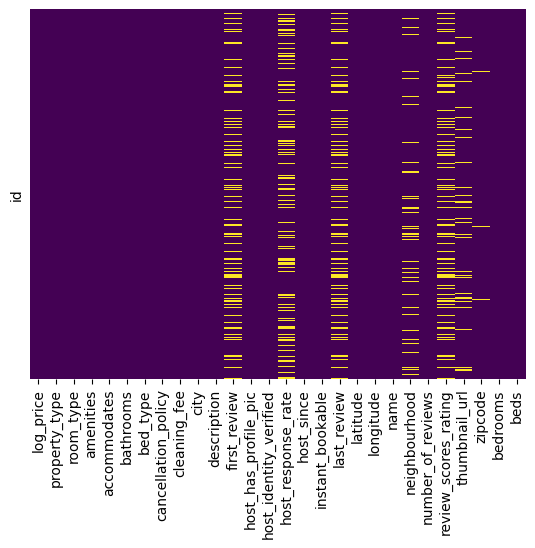

In [13]:
sns.heatmap(Data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
X = Data.isna().sum()
(X[X > 0] / Data.shape[0]).sort_values()

In [14]:
Data.first_review

id
6901257     2016-06-18
6304928     2017-08-05
7919400     2017-04-30
13418779           NaN
3808709     2015-05-12
               ...    
14549287           NaN
13281809    2016-08-15
18688039    2015-01-03
17045948           NaN
3534845     2013-09-05
Name: first_review, Length: 74111, dtype: object

In [15]:
Data.host_since = pd.to_datetime(Data.host_since)
Data.host_since

id
6901257    2012-03-26
6304928    2017-06-19
7919400    2016-10-25
13418779   2015-04-19
3808709    2015-03-01
              ...    
14549287   2013-03-24
13281809   2016-05-03
18688039   2012-01-05
17045948   2017-09-17
3534845    2012-11-26
Name: host_since, Length: 74111, dtype: datetime64[ns]

In [16]:
Data_first_review = pd.DataFrame( {
    'year' : pd.DatetimeIndex(Data.first_review).year,
    'price' : Data.log_price
})
Data_first_review

,year,price
id,,
6901257,2016.0,5.010635
6304928,2017.0,5.129899
7919400,2017.0,4.976734
13418779,NaN,6.620073
3808709,2015.0,4.744932
...,...,...
14549287,NaN,4.605170
13281809,2016.0,5.043425
18688039,2015.0,5.220356


In [17]:
Data_first_review.year.value_counts()

year
2016.0    20779
2017.0    14978
2015.0    12036
2014.0     5243
2013.0     2704
2012.0     1503
2011.0      695
2010.0      252
2009.0       56
2008.0        1
Name: count, dtype: int64

In [18]:
Data_first_review.fillna(2007, inplace = True)
Data_first_review

,year,price
id,,
6901257,2016.0,5.010635
6304928,2017.0,5.129899
7919400,2017.0,4.976734
13418779,2007.0,6.620073
3808709,2015.0,4.744932
...,...,...
14549287,2007.0,4.605170
13281809,2016.0,5.043425
18688039,2015.0,5.220356


In [19]:
Data_first_review.groupby('year').mean('price')

,price
year,
2007.0,4.905548
2008.0,3.583519
2009.0,4.731654
2010.0,4.803525
2011.0,4.841094
2012.0,4.879375
2013.0,4.872223
2014.0,4.839271
2015.0,4.776621


In [20]:
col_cat = Data.select_dtypes(['object']).columns
col_cat

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'last_review', 'name', 'neighbourhood',
       'thumbnail_url', 'zipcode'],
      dtype='object')

In [21]:
for col in col_cat:
    print(col, " : ", Data[col].nunique())

property_type  :  35
room_type  :  3
amenities  :  67122
bed_type  :  5
cancellation_policy  :  5
city  :  6
description  :  73479
first_review  :  2554
host_has_profile_pic  :  2
host_identity_verified  :  2
host_response_rate  :  80
instant_bookable  :  2
last_review  :  1371
name  :  73359
neighbourhood  :  619
thumbnail_url  :  65883
zipcode  :  769


In [22]:
Data.host_has_profile_pic.value_counts()

host_has_profile_pic
t    73697
f      226
Name: count, dtype: int64

In [23]:
Data.host_has_profile_pic = Data.host_has_profile_pic.fillna('f')
Data.host_has_profile_pic.value_counts()

host_has_profile_pic
t    73697
f      414
Name: count, dtype: int64

In [24]:
Data.drop(['host_has_profile_pic', 'zipcode', 'name', 'host_response_rate', 'neighbourhood'], axis=1, inplace=True)


In [27]:
outliers = Data[(Data['log_price'] < 2.5) | (Data['log_price'] > 7.5)].sort_values(by='log_price')
outliers.index


Index([17972519,  4822822, 16324410,  9937558,   635662,  7091102, 16148051,
        4868466, 13550969, 10035324, 10500033,  6357564, 10288459, 14944663,
       10056245, 17772925,  8886036, 11968056, 10138870, 17284334,  8191540,
        2396125,   918049,  7326365, 19177019, 16555985, 13032893, 14933982,
        7717877,  9117980, 19364229, 15464274,  7864877,  8386663, 12156285,
        1012454, 10011509,  1906804,   815879, 14188141,  3954385, 14959195,
       17448630, 15568588, 10153794, 19602101,    52713, 15771318,  4100790,
        4490104, 16285789,  4396985, 19839317, 17498442, 11777292,  2320277,
        1301321, 17368753, 20001006, 11974572,  7545274,  1738146, 20979310,
       13751426,  3962389, 16383008, 20459710, 20230917,  7397916,  1240935,
       11895042, 16755372, 14095274, 17943829],
      dtype='int64', name='id')

Text(0.5, 1.0, '2')

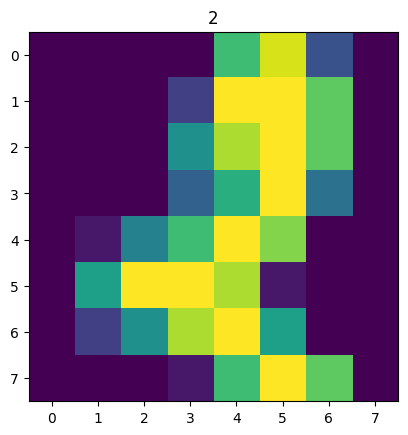

In [28]:
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest

digits = load_digits()
X = digits.data ; y = digits.target
images = digits.images
model = IsolationForest(random_state=0, 
     contamination=0.02)
model.fit(X)
# Predict est un tableau de 1 et -1 (anomalies)
anomalies = np.where(model.predict(X)==-1)
plt.imshow(images[anomalies][0]) 
plt.title(y[anomalies][0])

In [30]:
Data_exclude_obj = Data.select_dtypes(exclude=['object', 'bool'])


In [31]:
Data_exclude_obj.corr()

,log_price,accommodates,bathrooms,host_since,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.567574,0.355420,-0.004978,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,0.567574,1.000000,0.505632,0.013148,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,0.355420,0.505632,1.000000,0.014314,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
host_since,-0.004978,0.013148,0.014314,1.000000,-0.032506,-0.034881,-0.019266,-0.002549,0.008657,0.012819
latitude,-0.002193,-0.078309,-0.137959,-0.032506,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.047529,-0.085160,-0.135026,-0.034881,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,-0.032470,0.041964,-0.041381,-0.019266,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.091219,-0.017128,0.010537,-0.002549,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,0.473212,0.709258,0.589935,0.008657,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416
beds,0.442153,0.810801,0.525591,0.012819,-0.080294,-0.082150,0.031109,-0.027330,0.709416,1.000000


<Axes: >

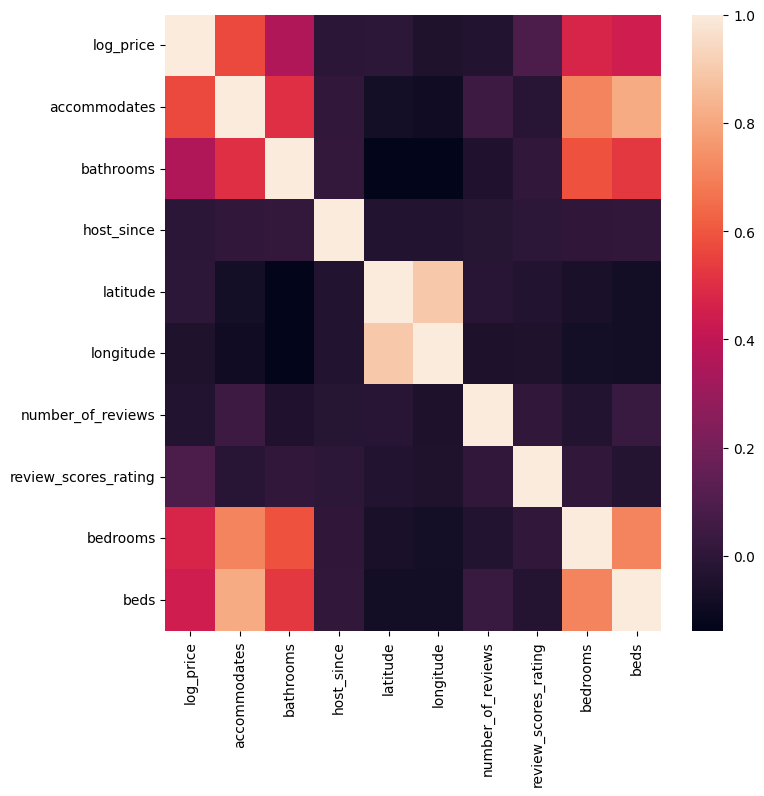

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(Data_exclude_obj.corr(), annot=False)

In [34]:
iris = sns.load_dataset('iris').select_dtypes(exclude = 'object')
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

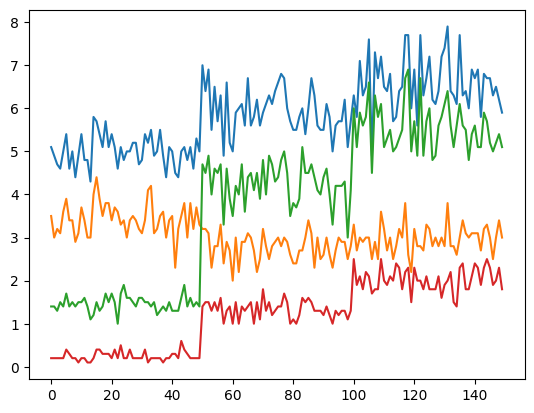

In [35]:
from sklearn.feature_selection import VarianceThreshold
iris.var(axis=0)
plt.plot(iris)
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(iris)

In [36]:
Data.cleaning_fee.value_counts()

cleaning_fee
True     54403
False    19708
Name: count, dtype: int64

In [37]:
Data.cleaning_fee.apply(lambda x : 0 if x == True else 1)

id
6901257     0
6304928     0
7919400     0
13418779    0
3808709     0
           ..
14549287    1
13281809    0
18688039    0
17045948    0
3534845     1
Name: cleaning_fee, Length: 74111, dtype: int64